In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# Read in the test result of model
result = np.load("../result/result.npy");

In [36]:
pred_labels = result[0,:,:];
real_labels = result[1,:,:];

In [37]:
class_acc = np.zeros(10)
for m_class in xrange(10):
    class_acc[m_class] = np.mean(np.equal(np.argmax(pred_labels[np.argmax(real_labels, axis=1)==m_class],axis=1),m_class));

In [38]:
class_acc

array([ 0.99898683,  0.99735915,  1.        ,  0.99901088,  0.99391481,
        0.98882682,  0.99168399,  0.99709865,  0.99387755,  0.99117647])

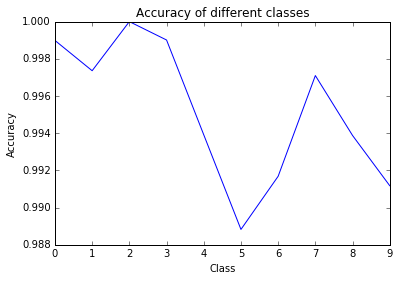

In [39]:
plt.figure();
plt.plot(class_acc);
plt.title("Accuracy of different classes")
plt.xlabel("Class");
plt.ylabel("Accuracy");
plt.show()